In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
file_name1 = "monthly sea level.txt"
file_name2 = "monthly air temp.txt"
file_name3 = "monthly water temp.txt"

# f = open(file_name, "r")
# print(f.read())

sl_monthly_df = pd.read_csv(file_name1,header=2,delimiter='\s+')
at_monthly_df = pd.read_csv(file_name2,header=2,delimiter='\s+')
wt_monthly_df = pd.read_csv(file_name3,header=2,delimiter='\s+')

## Clear Dataset: transform datetime into time series form 

In [169]:
df1 = sl_monthly_df[sl_monthly_df['Mean'].isnull().values]
df2 = sl_monthly_df[sl_monthly_df['Maximum'].isnull().values]
df3 = sl_monthly_df[sl_monthly_df['Minimum'].isnull().values]
pd.concat([df1, df2, df3]).reset_index(drop=True)

,Mth,Year,Gaps,Good,Minimum,Maximum,Mean,St,Devn
0,10,1993,7440,0,NaN,NaN,NaN,NaN,NaN
1,7,2012,7440,0,NaN,NaN,NaN,NaN,NaN
2,9,2019,7200,0,NaN,NaN,NaN,NaN,NaN
3,10,1993,7440,0,NaN,NaN,NaN,NaN,NaN
4,7,2012,7440,0,NaN,NaN,NaN,NaN,NaN
5,9,2019,7200,0,NaN,NaN,NaN,NaN,NaN
6,10,1993,7440,0,NaN,NaN,NaN,NaN,NaN
7,7,2012,7440,0,NaN,NaN,NaN,NaN,NaN
8,9,2019,7200,0,NaN,NaN,NaN,NaN,NaN


In [137]:
#sl_monthly_df['DATE'] = pd.to_datetime(sl_monthly_df[['Year', 'Mth']].assign(DAY=1))
#sl_monthly_df.info()

sl_monthly_df['Date'] = pd.to_datetime(sl_monthly_df.Year.astype(str) + '/' + sl_monthly_df.Mth.astype(str) + '/01')
sl_monthly_df.drop(['Year', 'Mth'], axis=1, inplace=True)

at_monthly_df['Date'] = pd.to_datetime(at_monthly_df.Year.astype(str) + '/' + at_monthly_df.Mth.astype(str) + '/01')
at_monthly_df.drop(['Year', 'Mth'], axis=1, inplace=True)

wt_monthly_df['Date'] = pd.to_datetime(wt_monthly_df.Year.astype(str) + '/' + wt_monthly_df.Mth.astype(str) + '/01')
wt_monthly_df.drop(['Year', 'Mth'], axis=1, inplace=True)

### Clear Dataset: remove NaN data
### Question: Should drop the rows that NaN appears in each dataseats based on self dataset, or based on all 3 datasets?

In [158]:
print(sl_monthly_df['Mean'].isnull().values.any())
print(sl_monthly_df['Minimum'].isnull().values.any())
print(sl_monthly_df['Maximum'].isnull().values.any())

print(at_monthly_df['Mean'].isnull().values.any())
print(at_monthly_df['Minimum'].isnull().values.any())
print(at_monthly_df['Maximum'].isnull().values.any())

print(wt_monthly_df['Mean'].isnull().values.any())
print(wt_monthly_df['Minimum'].isnull().values.any())
print(wt_monthly_df['Maximum'].isnull().values.any())


sl_monthly_df.dropna(subset=['Mean', 'Minimum', 'Maximum'], inplace = True)
at_monthly_df.dropna(subset=['Mean', 'Minimum', 'Maximum'], inplace = True)
wt_monthly_df.dropna(subset=['Mean', 'Minimum', 'Maximum'], inplace = True)

sl_monthly_df.shape, at_monthly_df.shape, wt_monthly_df.shape

False
False
False
False
False
False
False
False
False


((356, 8), (308, 8), (324, 8))

## Raw Visualization

### Sea Level

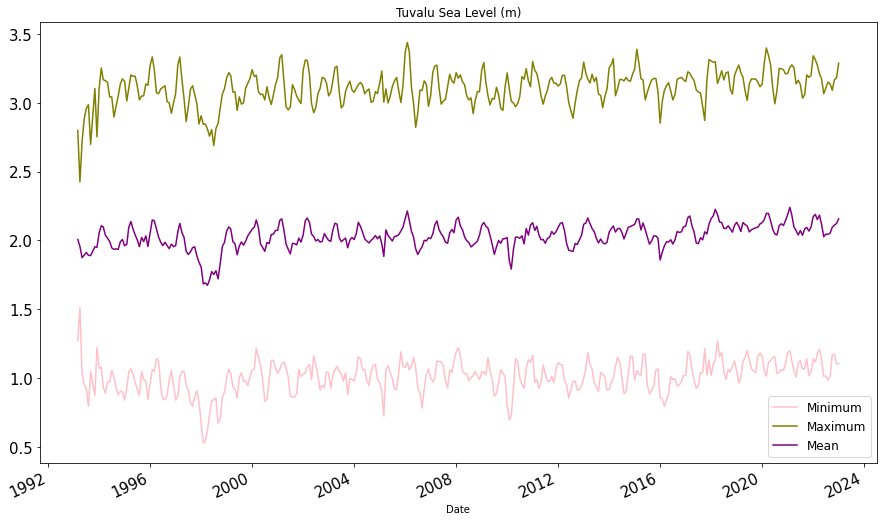

In [152]:
titles = [
    "Minimum",
    "Maximum",
    "Mean",
]

feature_keys = [
    "Minimum",
    "Maximum",
    "Mean",
]

colors = [
    "pink",
    "olive",
    "purple",
]

date_time_key = "Date Time"


def show_raw_visualization(data, main_title):
    time_data = data['Date']
    plt.figure(figsize=(15,9))
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        t_data.plot(
            color = c,
            title = main_title,
            fontsize = 15,
            rot = 25,
            label = titles[i]
        )
    plt.legend(fontsize = 12)
    plt.show()


show_raw_visualization(sl_monthly_df, "Tuvalu Sea Level (m)")

### Air temperatures 

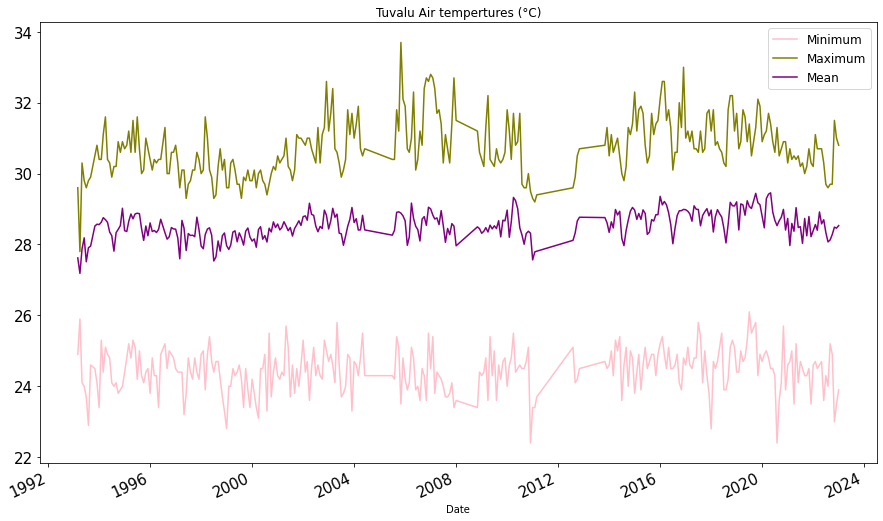

In [153]:
show_raw_visualization(at_monthly_df, "Tuvalu Air tempertures (°C)")

### Water Temperature

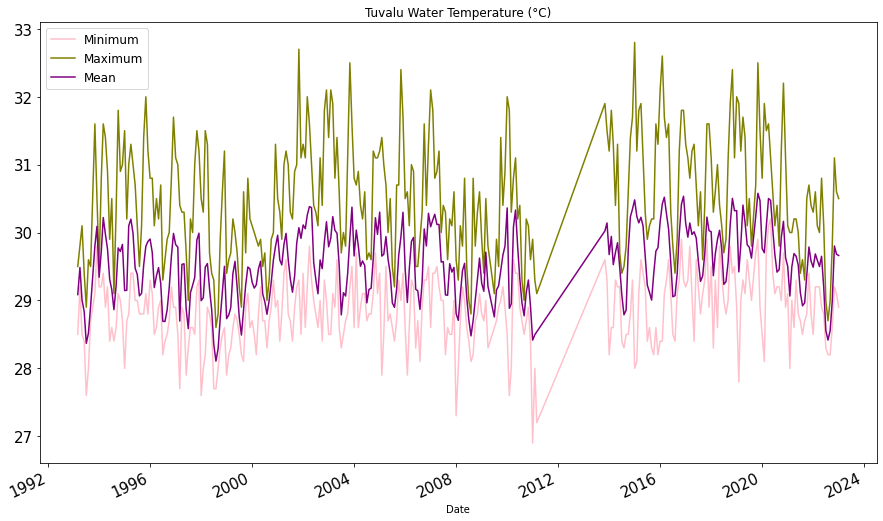

In [154]:
show_raw_visualization(wt_monthly_df, "Tuvalu Water Temperature (°C)")